<a href="https://colab.research.google.com/github/Ubayword/Pengolahan-Citra-Digital-Tugas-UAS/blob/main/Gaussian_Noise%2Cmedian_filtering_dan_NLM_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gambar Asli:


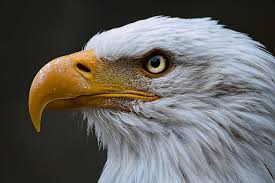

Gambar dengan Noise:


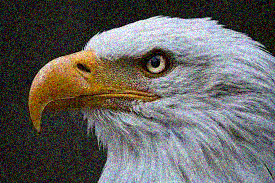

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Pastikan file gambar ada di direktori kerja Google Colab
# Jika file belum diunggah, gunakan kode berikut untuk mengunggah file:
# from google.colab import files
# uploaded = files.upload()

# Memuat gambar
image_path = 'ayam.jpg'  # Ganti dengan nama file gambar yang sesuai
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Memeriksa apakah gambar berhasil dimuat
if img is None:
    print(f"Error: Tidak dapat memuat gambar dari {image_path}. Pastikan file sudah diunggah ke direktori kerja.")
else:
    # Membuat noise Gaussian
    mean = 0
    std_dev = 25
    gaussian_noise = np.random.normal(mean, std_dev, img.shape).astype(np.float32)

    # Menambahkan noise Gaussian ke gambar
    noisy_img = img.astype(np.float32) + gaussian_noise

    # Membatasi nilai agar tetap dalam rentang valid dan mengonversi kembali ke uint8
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    # Menampilkan gambar asli dan gambar dengan noise
    print("Gambar Asli:")
    cv2_imshow(img)

    print("Gambar dengan Noise:")
    cv2_imshow(noisy_img)

    # Menyimpan gambar dengan noise ke file
    output_path = 'gausian_image.jpg'
    cv2.imwrite(output_path, noisy_img)

gausian noise:


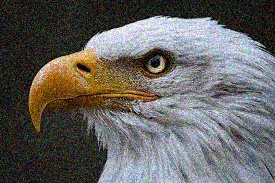

gausian blur:


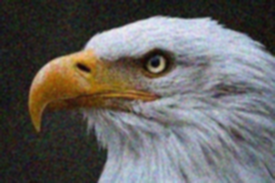

In [ ]:
#noise gausian ke gausian blur
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = 'gausian_image.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Apply Gaussian blur
# Parameters: (5, 5) is the kernel size, and 0 means the standard deviation is calculated based on the kernel size
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Display the original and blurred images
print("gausian noise:")
cv2_imshow(img)
print("gausian blur:")
cv2_imshow(blurred_img)

gausian noise:


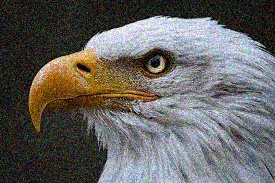

Median Filtered:


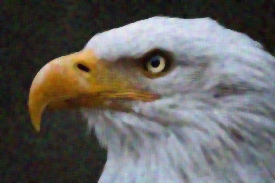

In [ ]:
#dari noise gosian di hilang pake median filtering
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = 'gausian_image.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Apply median filtering
# Parameter: 5 is the kernel size
median_filtered_img = cv2.medianBlur(img, 5)

# Display the original and median filtered images
print("gausian noise:")
cv2_imshow(img)
print("Median Filtered:")
cv2_imshow(median_filtered_img)

gausian noise:


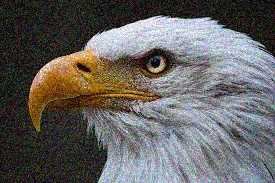

non local min denoising:


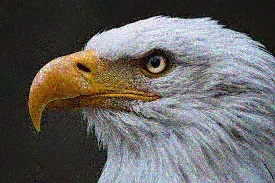

In [ ]:
#dari gosian noise ke non local min denoising
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = 'gausian_image.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert to grayscale (if desired)
gray_img = cv2.cvtColor(img, cv2.IMREAD_COLOR)

# Apply Non-Local Means denoising
# Parameters: h is the filter strength, hForColorComponents is usually same as h, templateWindowSize, searchWindowSize
denoised_img = cv2.fastNlMeansDenoising(gray_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Menampilkan gambar asli dan hasil
print("gausian noise:")
cv2_imshow(gray_img)
print("non local min denoising:")
cv2_imshow(denoised_img)

Mengapa Gambar Tidak Kembali Seperti Gambar Asli Setelah Proses Denoising?
Gambar yang telah ditambahkan noise Gaussian sulit untuk dipulihkan sepenuhnya seperti gambar aslinya meskipun menggunakan metode denoising terbaik.

Ingat bahwa tidak ada metode denoising yang dapat sepenuhnya mengembalikan gambar asli. Hasil terbaik adalah gambar yang noise-nya berkurang tetapi detail penting tetap dipertahankan

Coba algoritma denoising yang lebih canggih, seperti Bilateral Filtering atau teknik berbasis deep learning, untuk hasil yang lebih baik